<a href="https://colab.research.google.com/github/nikhil2027/nikhil2027/blob/main/Updated_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspellchecker
!pip install emoji
!pip install googletrans
!pip install nltk
!pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=dcd33417521acb0a4d16718181ee94f3f1ce3f5285e2677d28815e93341eedc5
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a

In [2]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import re,string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import emoji
import pandas as pd
from googletrans import Translator
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from nltk.corpus import wordnet
from sklearn.metrics import classification_report
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

#google translate
translator = Translator(service_urls =['translate.google.com'])

#pyspellchecker
spell = SpellChecker()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
#label 0 means negative and 4 means positive
data = pd.read_csv("test_data.csv",skip_blank_lines=True,encoding = "latin")
data

,ï»¿Label,number,date,no_query,name,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
39996,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
39997,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
39998,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
39999,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [4]:
l=[]
for i in data["ï»¿Label"]:
    if(i==0):
        l.append("negative")
    else:
        l.append("positive")
data['label']=l

In [5]:
#dropping unwanted columns
data=data.drop(columns=['number', 'date','name','no_query','ï»¿Label'])

In [6]:
data

,Tweet,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative
...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive
39997,Mid-morning snack time... A bowl of cheese noo...,positive
39998,@ShaDeLa same here say it like from the Termi...,positive
39999,@DestinyHope92 im great thaanks wbuu?,positive


In [9]:
#removes all emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [ ]:
def contractions():

    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "ily":"I love you",
        "Ily":"I love you",
        "Ihy":"I hate you",
        "ihy":"I hate you",
        "imy":"I miss you",
        "Imy":"I miss you",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "im":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "shit":"bad",
        "tmr":"tomorrow",
        "tmrw":"tomorrow",
        "u":"you",
        "ur":"your",
        "k":"okay",
        "ok":"okay",
        "da":"the",
        "tom":"tomorrow",
        "Tom":"tomorrow",
        "v'll":"we will",
        "wassup":"what is up with you",
        "waddup":"what is up with you",
        "yo":"greet",
        "hey":"greet",
        "lol":"laugh",
        "lmao":"laugh",
        "Lmao":"laugh",
        "rofl":"laugh",
        "y":"why",
        "wut":"what",
        "wat":"what",
        "stfu":"angry",
        "wtf":"angry",
        "ya":"yes",
        "yeah":"yes",
        "ummmm":"confused",
        "ummm":"confused",
        "umm":"confused",
        "hmmm":"confused",
        "i'm":"I am",
        "awww":"amazement",
        "Awww":"amazement",
        "aww":"amazement",
        "Aww":"amazement",
        "can't":"cannot",
        "Can't":"cannot",
        "CAN'T":"cannot",
        "awe":"amazement",
        "Awe":"amazement",
        "ugh":"sad",
        "ughh":"sad",
        "Ugh":"sad",
        "Ughh":"sad",
        "UGHH":"sad",
        "ughhhh":"sad",
        "ughhh":"sad"
        }



In [ ]:
def emoticons():

    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":((((":"sad",
        ":(((":"sad",
        ":((":"sad",
        ":(":"sad",
        ":/":"sad",
        ":///":"sad",
        ":////":"sad",
        "://///":"sad",
        "://":"sad",
        ":///////":"sad",
        ":////":"sad",
        "-_-":"angry",
        ":|":"normal",
        ";)":"playful",
        ";D":"playful",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }




In [ ]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=contractions()
    emoji=emoticons()
    for word in list_sent:
        #removal of url
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word)

        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            #print(word)
            word=spell.correction(word.lower())
            word=re.sub("[0-9]+","",word)
            word=re.sub("[.]+"," ",word)
            word=re.sub("[-]+"," ",word)
            word=re.sub("[_]+"," ",word)
            word = re.sub("~"," ", word)
            if(len(word)!=1):
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    return lemmatization(cleaned_st)




In [ ]:
def lemmatization(sent):
    lemmatize=WordNetLemmatizer()
    sentence_after_lemmatization=[]
    for word,tag in pos_tag(word_tokenize(sent)):
        if(tag[0:2]=="NN"):
            pos='n'
        elif(tag[0:2]=="VB"):
            pos='v'
        else:
            pos='a'
        lem=lemmatize.lemmatize(word,pos)
        sentence_after_lemmatization.append(lem)
    st=""
    for i in sentence_after_lemmatization:
        if(i!="be" and i!="is" and len(i)!=1):
            st=st+" "+i
    #print("lemi",st)
    c=0
    list_text=st.split()
    flag=0
    new_st=""
    for i in list_text:
        temp=i
        if(flag==1):
            flag=0
            continue
        if(i=="not" and (c+1)<len(list_text)):
            for syn in wordnet.synsets(list_text[c+1]):
                antonyms=[]
                for l in syn.lemmas():
                    #print(l)
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                        #print(antonyms)
                        temp=antonyms[0]
                        flag=1
                        break
                if(flag==1):
                    break
        new_st=new_st+" "+temp
        c+=1
    #print(new_st)
    return new_st



In [ ]:
#nltk module to get the sentiment polarity
def sentiment_analysis(sent):
        sid = SentimentIntensityAnalyzer()
        #print("-------------------------------------")
        print(sent)
        #print("-------------------------------------")
        ss = sid.polarity_scores(sent)
        x=ss['pos']
        y=ss['neg']
        print(x-y)
        print("-------------------------------------")
        return x-y



In [ ]:
def start(text):
    #removes html tags
    text =BeautifulSoup(text).get_text()
    text =text.replace("’","'")
    new_text=sent_tokenize(text)
    #print((new_text))
    result=0
    new_str=""
    #removing emojis
    for i in new_text:
        j=deEmojify(i)
        res=removal_of_noise(j)
        new_str=new_str+" "+res
    return new_str


In [31]:
clean_list = []
for i in data["Tweet"]:
    if i.strip():  # only process non-empty tweets
        try:
            x = start(str(i))  # Convert to string
            clean_list.append(x)

            print()
            print(i)  # Print the original tweet
            print()
            print(x)  # Print the cleaned tweet
            print("-------------------------")
        except Exception as e:
            print(f"Error processing tweet: {i}\nError: {e}")


<ipython-input-25-324d00c3dd93>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text =BeautifulSoup(text).get_text()



@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D

  away bummer  should get avid care third day  playful
-------------------------
Error processing tweet: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Error: expected string or bytes-like object

@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds

  dive many time ball  manage save rest go bound
-------------------------

my whole body feels itchy and like its on fire 

  we body feels itchy like fire
-------------------------

@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 

  misbehave  mad   not see
-------------------------

@Kwesidei not the whole crew 

  not we crew
-------------------------

Need a hug 

  need hug
-------------------------

@LOLTrish hey  long time no see! Yes.. Rains a bit ,onl

KeyboardInterrupt: 

In [ ]:
with open('cleaned_tweet.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item)

In [ ]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "cleaned_tweet.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data["cleaned_tweets"]=lines

ValueError: Length of values (1) does not match length of index (40001)

In [ ]:
#reading the adjective file
filename = "english-adjectives.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
adjectives=lines

In [ ]:
#All adjectives words in the file
all_words=[]
negative=["not"]
for i in data["cleaned_tweets"]:
    for word in word_tokenize(i):
        if(word in adjectives or word in negative):
        #if(word in adjectives ):
            all_words.append(word)

len(all_words)

45125

In [ ]:
#creating a frequency distribution of each adjectives.
import nltk
BagOfWords = nltk.FreqDist(all_words)
BagOfWords
len(BagOfWords)

946

In [ ]:
# listing the  5000 most frequent words
word_features = list(BagOfWords.keys())[:5000]
len(word_features)
#word_features

946

In [ ]:
#after preprocessing data
data


,Tweet,label,cleaned_tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,aww bummer should get david carr third day ...
1,is upset that he can't update his Facebook by ...,negative,upset update casebook test might cry result ...
2,@Kenichan I dived many times for the ball. Man...,negative,dive many time ball manage save rest go bound
3,my whole body feels itchy and like its on fire,negative,le body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",negative,behaving mad see
...,...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive,grandma make dinner mum
39997,Mid-morning snack time... A bowl of cheese noo...,positive,mid morning snack time bowl cheese noodle yum
39998,@ShaDeLa same here say it like from the Termi...,positive,say like terminator movie come like
39999,@DestinyHope92 im great thaanks wbuu?,positive,great thanks but


In [ ]:
#assigning feature for each row in clean_tweets
new_list=[]
for i in data["cleaned_tweets"]:
    st=""
    for j in i.split():
        if(j in word_features):
            st=st+" "+j
    new_list.append(st)

data["cleaned_tweets"]=new_list

In [ ]:
data

,Tweet,label,cleaned_tweets
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,third playful
1,is upset that he can't update his Facebook by ...,negative,upset
2,@Kenichan I dived many times for the ball. Man...,negative,
3,my whole body feels itchy and like its on fire,negative,itchy
4,"@nationwideclass no, it's not behaving at all....",negative,mad
...,...,...,...
39996,My GrandMa is making Dinenr with my Mum,positive,
39997,Mid-morning snack time... A bowl of cheese noo...,positive,
39998,@ShaDeLa same here say it like from the Termi...,positive,
39999,@DestinyHope92 im great thaanks wbuu?,positive,great


In [ ]:
#Spliting into test data and train data
y=data["label"]
x=data.drop('label',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [ ]:
x_train.shape

(34000, 2)

In [ ]:
#creating test and train data frames
X_train = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
X_test = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
Y_train = []
Y_test = []
X_train = X_train.append(x_train)
for i in y_test:
    Y_test.append(i)
for i in y_train:
     Y_train.append(i)
X_test = X_test.append(x_test)

In [ ]:
#spliting into train sets for training
training_set=[]
count=0
for i in (X_train["cleaned_tweets"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
training_set_formatted

[({'pretty': True, 'great': True, 'cute': True, 'partially': True},
  'positive'),
 ({'dream': True}, 'negative'),
 ({}, 'negative'),
 ({}, 'positive'),
 ({'full': True, 'wonderful': True, 'handmade': True}, 'positive'),
 ({'first': True}, 'positive'),
 ({'heavily': True}, 'negative'),
 ({}, 'positive'),
 ({'short': True, 'purple': True, 'young': True}, 'positive'),
 ({'good': True}, 'positive'),
 ({'almost': True, 'good': True}, 'negative'),
 ({}, 'positive'),
 ({'mean': True, 'tasty': True}, 'positive'),
 ({'sick': True, 'bad': True, 'even': True}, 'negative'),
 ({'good': True}, 'positive'),
 ({'sad': True, 'bright': True, 'exciting': True}, 'positive'),
 ({}, 'negative'),
 ({}, 'positive'),
 ({}, 'negative'),
 ({'great': True}, 'positive'),
 ({}, 'negative'),
 ({}, 'positive'),
 ({'single': True}, 'negative'),
 ({'beautiful': True, 'sad': True}, 'negative'),
 ({'dead': True, 'sad': True}, 'negative'),
 ({'happy': True, 'possible': True, 'good': True, 'luck': True, 'back': True},
  '

In [ ]:
#spliting into test sets for testing
test_set=[]
count=0
for i in (X_test["cleaned_tweets"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])


test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]

In [ ]:
from sklearn.metrics import recall_score,precision_score
#making a list of classifiers with their names
classifiers=[]
#making a list of classifiers with their accuracy
accuracy=[]

In [ ]:
#naive bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set_formatted)

ground_truth = [r[1] for r in test_set_formatted]
preds = [classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

#accuracy
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_set_formatted))*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)
print()

classifier.show_most_informative_features(15)

classifiers.append([classifier,"naive bayes classifier"])

accuracy.append([(nltk.classify.accuracy(classifier, test_set_formatted))*100,"NB"])

print("Original Naive Bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Original Naive Bayes Algo accuracy percent: 62.07298783536077

Most Informative Features
                 awesome = True           positi : negati =     18.4 : 1.0
                  female = True           negati : positi =     14.1 : 1.0
                  lonely = True           negati : positi =     13.1 : 1.0
                 worried = True           negati : positi =     13.0 : 1.0
                    poor = True           negati : positi =     12.4 : 1.0
                    sick = True           negati : positi =     12.2 : 1.0
                terrible = True           negati : positi =     11.8 : 1.0
                 welcome = True           positi : negati =     10.7 : 1.0
           unfortunately = True           negati : positi =     10.6 : 1.0
                   proud = True           positi : negati =     10.4 : 1.0
                     sad = True           negati : positi =     10.3 : 1.0
                  broken = True           negati : positi =      9.5 : 1.0
           

In [ ]:
#Multinomail naive bayes
MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf.train(training_set_formatted)
print("Multinomail naive bayes classifier accuracy percent:", (nltk.classify.accuracy(MNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [MNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(MNB_clf, test_set_formatted))*100,"MNB"])

classifiers.append([MNB_clf,"Multinomail naive bayes classifier"])

print("Multinomail naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Multinomail naive bayes classifier accuracy percent: 62.206298950174975
Multinomail naive bayes

              precision    recall  f1-score   support

    positive       0.59      0.79      0.67      2979
    negative       0.69      0.46      0.55      3022

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



In [ ]:
#Bernouli naive bayes
BNB_clf = SklearnClassifier(BernoulliNB())
BNB_clf.train(training_set_formatted)
print("Bernoulli naive bayes classifier accuracy percent:", (nltk.classify.accuracy(BNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [BNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(BNB_clf, test_set_formatted))*100,"BNB"])

classifiers.append([BNB_clf,"Bernouli classifier"])

print("Bernouli naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Bernoulli naive bayes classifier accuracy percent: 62.206298950174975
Bernouli naive bayes

              precision    recall  f1-score   support

    positive       0.59      0.79      0.67      2979
    negative       0.69      0.46      0.55      3022

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



In [ ]:
#Logistic regression
LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set_formatted)
print("Logistic Regression classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [LogReg_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100,"LogReg"])


classifiers.append([LogReg_clf,"Bernouli LogisticRegression_classifier"])

print("Logistic regression\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


C:\Users\Masterigs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression classifier accuracy percent: 62.256290618230295
Logistic regression

              precision    recall  f1-score   support

    positive       0.59      0.78      0.67      2979
    negative       0.68      0.47      0.55      3022

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



In [ ]:
#Stochastic Gradient Descent classifier
SGD_clf = SklearnClassifier(SGDClassifier())
SGD_clf.train(training_set_formatted)
print("Stochastic Gradient Descent Classifier_classifier accuracy percent:", (nltk.classify.accuracy(SGD_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SGD_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SGD_clf, test_set_formatted))*100,"SGD"])


classifiers.append([SGD_clf,"SGD classifier"])

print("Stochastic Gradient Descent\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Stochastic Gradient Descent Classifier_classifier accuracy percent: 61.23979336777203
Stochastic Gradient Descent

              precision    recall  f1-score   support

    positive       0.69      0.40      0.51      2979
    negative       0.58      0.82      0.68      3022

    accuracy                           0.61      6001
   macro avg       0.64      0.61      0.59      6001
weighted avg       0.63      0.61      0.59      6001



In [ ]:
#Support vector classifier
SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set_formatted)
print("Support vector classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SVC_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"SVC"])

classifiers.append([SVC_clf,"SVC classifier"])

print("Support vector classifier\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Support vector classifier accuracy percent: 61.38976837193801
Support vector classifier

              precision    recall  f1-score   support

    positive       0.58      0.79      0.67      2979
    negative       0.68      0.44      0.53      3022

    accuracy                           0.61      6001
   macro avg       0.63      0.62      0.60      6001
weighted avg       0.63      0.61      0.60      6001



In [ ]:
#Max Entropy classifier
from nltk.classify import  MaxentClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import f1_score

def max_ent(training_set_formatted):
    numIterations = 100
    algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
    classifier = nltk.MaxentClassifier.train(training_set_formatted, algorithm, max_iter=numIterations)
    classifier.show_most_informative_features(10)
    return classifier

maxent_classifier=max_ent(training_set_formatted)


ground_truth = [r[1] for r in test_set_formatted]

preds = [maxent_classifier.classify(r[0]) for r in test_set_formatted]

f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

print("Accuracy : ",f1_score(ground_truth, preds, labels = ['positive', 'negative'], average = 'micro')*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"MaxEnt"])


classifiers.append([maxent_classifier,"Max Entropy classifier"])

print("Max Entropy\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.499
             2          -0.69295        0.625
             3          -0.69276        0.625
             4          -0.69257        0.625
             5          -0.69237        0.625
             6          -0.69218        0.625
             7          -0.69199        0.625
             8          -0.69180        0.625
             9          -0.69160        0.625
            10          -0.69141        0.625
            11          -0.69122        0.625
            12          -0.69103        0.625
            13          -0.69084        0.625
            14          -0.69065        0.625
            15          -0.69046        0.625
            16          -0.69027        0.625
            17          -0.69008        0.625
            18          -0.68989        0.625
            19          -0.68970        0.625
 

In [ ]:
from nltk.classify import ClassifierI
from statistics import mode

# Defininig the ensemble model class

class EnsembleClassifier(ClassifierI):

    def __init__(self, *classifiers):
        self._classifiers = classifiers

    # returns the classification based on majority of votes
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)


In [ ]:
# Initializing the ensemble classifier
def hybrid(test_set_formatted):
    ensemble_clf = EnsembleClassifier(classifiers[0][0], classifiers[1][0], classifiers[2][0], classifiers[3][0],classifiers[4][0],classifiers[5][0],classifiers[6][0])

    # List of only feature dictionary from the featureset list of tuples
    feature_list = [f[0] for f in test_set_formatted]
    global c
    # Looping over each to classify each review
    ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]
    for i in range(len(ensemble_preds)):
        if(ensemble_preds[i]==Y_test[i]):
            c+=1
    return ensemble_preds
c=0
preds=hybrid(test_set_formatted)
ground_truth = [r[1] for r in test_set_formatted]


f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')
print("Accuracy of hybrid : ",100*c/len(preds))
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([100*c/len(preds),"Hybrid"])

print("Hybrid\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Accuracy of hybrid :  62.256290618230295
Hybrid

              precision    recall  f1-score   support

    positive       0.59      0.79      0.67      2979
    negative       0.69      0.46      0.55      3022

    accuracy                           0.62      6001
   macro avg       0.64      0.62      0.61      6001
weighted avg       0.64      0.62      0.61      6001



In [ ]:
accuracy

[[62.07298783536077, 'NB'],
 [62.206298950174975, 'MNB'],
 [62.206298950174975, 'BNB'],
 [62.256290618230295, 'LogReg'],
 [61.23979336777203, 'SGD'],
 [61.38976837193801, 'SVC'],
 [61.38976837193801, 'MaxEnt'],
 [62.256290618230295, 'Hybrid']]

In [6]:
from matplotlib import pyplot as plt
import numpy as np

# x-axis values
x=[]
for i in accuracy:
    x.append(i[0])

# Y-axis values
y = []
for i in accuracy:
    y.append(i[1])

# Function to plot
plt.plot(y,x)


# function to show the plot
plt.show()

NameError: name 'accuracy' is not defined

Confusion matrix, without normalization
[[2306  694]
 [1595 1406]]
Normalized confusion matrix
[[0.77 0.23]
 [0.53 0.47]]


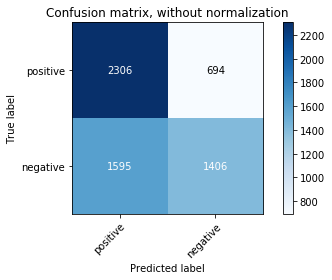

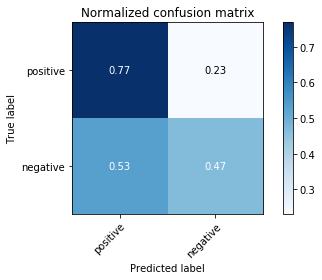

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



class_names = [ 'positive','negative']



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
def features(text):
    new_list=[]
    for i in text.split():
        if(i in adjectives):
            new_list.append(i)
    return new_list

In [ ]:
def text_classify(text):
    cleaned_text=start(text)
    temp=features(cleaned_text)
    test_data=list_to_dict(temp)
    print(temp)
    print("Tweet given by user : ",text)
    for i in classifiers:
        print(i[1])
        determined_label=i[0].classify(test_data)
        print("This Tweet is ",determined_label)
        print("------------------------------")
    c=0
    print("Hybrid model")
    testset_data=[]
    testset_data.append([test_data,""])
    lab=hybrid(testset_data)
    print("This Tweet is ",lab[0])

In [ ]:
from nltk.corpus import twitter_samples

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
x=negative_tweets[:1000]
st=""
for i in x:
    st=st+" "+i
st

' hopeless for tmr :( Everything in the kids section of IKEA is so cute. Shame I\'m nearly 19 in 2 months :( @Hegelbon That heart sliding into the waste basket. :( “@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too Dang starting next week I have "work" :( oh god, my babies\' faces :( https://t.co/9fcwGvaki0 @RileyMcDonough make me smile :(( @f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2" Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz I have a really good m&amp;g idea but I\'m never going to meet them :((( @Rampageinthebox mare ivan :( @SophiaMascardo happy trip, keep safe. see you soon :* :( I\'m so tired hahahah :( @GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch. relate to the "sweet n\' sour" kind of "bi-polar

In [ ]:
text_classify(st)

['sad', 'cute', 'sad', 'sad', 'sad', 'next', 'sad', 'sad', 'sad', 'sad', 'good', 'sad', 'sad', 'happy', 'safe', 'sad', 'tired', 'sad', 'sweet', 'sour', 'kind', 'full', 'sad', 'sad', 'sad', 'stupid', 'not', 'basic', 'digital', 'sad', 'good', 'sad', 'lonely', 'sad', 'sad', 'hard', 'long', 'sad', 'sad', 'far', 'sad', 'sad', 'safe', 'sad', 'sad', 'sad', 'sad', 'late', 'sad', 'sick', 'first', 'sad', 'sad', 'back', 'old', 'weird', 'pale', 'massive', 'rash', 'sad', 'sad', 'not', 'sad', 'cute', 'sad', 'busy', 'sad', 'next', 'sad', 'sad', 'sad', 'active', 'sad', 'incomplete', 'sad', 'sad', 'not', 'sad', 'bad', 'bad', 'sad', 'sad', 'sad', 'powerful', 'sad', 'sad', 'mammoth', 'dirty', 'clean', 'not', 'easy', 'green', 'sad', 'sad', 'hungry', 'sane', 'sad', 'sad', 'sad', 'true', 'sad', 'sad', 'sad', 'tired', 'sad', 'sad', 'massive', 'genuine', 'sad', 'late', 'sad', 'old', 'sad', 'back', 'sad', 'upset', 'sad', 'infinite', 'not', 'not', 'sad', 'serious', 'sad', 'hot', 'handsome', 'sad', 'bad', 'sad',

In [ ]:
#input from the user which will be used to classify
def hinglish(input_text):
    translator = Translator(service_urls=['translate.google.co.in'])
    x=translator.translate(input_text,src="hi",dest="en")
    text_classify(x.text)

In [ ]:
#input from the user which will be used to classify
from textblob import TextBlob

def hinglish2(input_text):
    l=input_text.split()
    st=""
    for i in l:
        word=TextBlob(i)
        if(word.detect_language()=="hi"):
            translator = Translator(service_urls=['translate.google.co.in'])
            x=translator.translate(i,src="hi",dest="en")
            st=st+" "+x.text
        else:
            st=st+" "+i
    text_classify(st)

In [ ]:
def func(input_text):
    l=input_text.split()
    flag=0
    for i in l:
        k=len(i)
        if(k<3):
            flag=1
            hinglish(input_text)
    if(not(flag)):
        hinglish2(input_text)


In [ ]:
func("arrey waah! I'm very proud of you")

['proud']
Tweet given by user :  Oh wow! E'm Very Proud OF U
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [ ]:
func("tum log pagal ho")

['mad']
Tweet given by user :  Are you mad?
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("tum pagal ho")

['mad']
Tweet given by user :  you are mad
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("tum kharab ho")

['bad']
Tweet given by user :  You're bad
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("you are foolish and horrible")

In [ ]:
func("you are not accha")

['evil']
Tweet given by user :   you are not good
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [ ]:
func("you are unpleasant")

['unpleasant']
Tweet given by user :   you are unpleasant
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [1]:

!pip install transformers datasets


In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv('test_data.csv')  # Replace with your actual file path

# Print column names
print("Columns in the dataset:")
print(df.columns)

# Check the class distribution
print("\nClass Distribution:")
print(df['Label'].value_counts())  # Check the unique label values

# Filter positive (assuming '4' is the positive label) and negative samples ('0' is the negative label)
positive_samples = df[df['Label'] == 4]  # Adjust according to your label for positive
negative_samples = df[df['Label'] == 0]  # Adjust according to your label for negative

# Check if the samples are not empty
if positive_samples.empty or negative_samples.empty:
    print("One of the classes is empty. Please check the class labels.")

# Sample 7500 from each class
if not positive_samples.empty and not negative_samples.empty:
    positive_sampled = positive_samples.sample(n=7500, random_state=42)  # Set random_state for reproducibility
    negative_sampled = negative_samples.sample(n=7500, random_state=42)

    # Combine the sampled data
    balanced_subset = pd.concat([positive_sampled, negative_sampled])

    # Shuffle the resulting DataFrame
    balanced_subset = balanced_subset.sample(frac=1, random_state=42).reset_index(drop=True)

    # Save the balanced subset to a new CSV file
    balanced_subset.to_csv('balanced_subset.csv', index=False)

    # Display the shape of the balanced subset
    print("\nBalanced Subset Shape:")
    print(balanced_subset.shape)  # Should be (15000, number_of_columns)

    # Display the first few rows of the balanced subset
    print("\nBalanced Subset:")
    print(balanced_subset.head())
else:
    print("Unable to sample from the dataset due to empty classes.")


Columns in the dataset:
Index(['Label', 'number', 'date', 'no_query', 'name', 'Tweet'], dtype='object')

Class Distribution:
Label
4    20001
0    20000
Name: count, dtype: int64

Balanced Subset Shape:
(15000, 6)

Balanced Subset:
   Label      number                          date  no_query             name  \
0      0  1554037988  Sat Apr 18 15:53:56 PDT 2009  NO_QUERY  TheShowstopper1   
1      4  1956145760  Thu May 28 21:16:34 PDT 2009  NO_QUERY   MelissaMcClure   
2      0  1556637833  Sat Apr 18 23:40:11 PDT 2009  NO_QUERY           andyyp   
3      4  1933072044  Tue May 26 22:55:29 PDT 2009  NO_QUERY         gwenniie   
4      4  1960185825  Fri May 29 07:33:40 PDT 2009  NO_QUERY         ahousley   

                                               Tweet  
0        @seriouslyrad I once had a dog named Rocky   
1                     In awe, wishing I could dance   
2   don't want to go back to school  lauren is back   
3  @jellyneo I'm not sure, sorry D: Welcome to Tw...  
4  Loo

In [1]:
!pip install datasets


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

# Load the balanced dataset
df = pd.read_csv('balanced_subset.csv')  # Adjust the path as necessary

# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')
model = RobertaForSequenceClassification.from_pretrained('distilroberta-base', num_labels=2)

# Prepare data for Hugging Face format
df['label'] = df['Label'].apply(lambda x: 1 if x == 4 else 0)  # Adjust according to your labels
dataset = Dataset.from_pandas(df[['Tweet', 'label']])

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['Tweet'], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Split dataset into train and evaluation
train_test_split = tokenized_datasets.train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
eval_dataset = train_test_split['test']

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,  # Adjust batch size if needed
    per_device_eval_batch_size=8,
    num_train_epochs=2,  # Reduced epochs
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    gradient_accumulation_steps=2,
    fp16=True,  # Enable mixed precision for GPU training
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,  # Add eval dataset for evaluation
)

# Train the model
trainer.train()

# Save the model
trainer.save_model('./roBerta_model')  # Save the trained model


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/15000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.472600,0.373001
